## Business Understanding

Airbnb is a marketplace that offers a wide range of hosts in different places arround the world. AS a part of the Udacity data 
scientist nanodegree, this blog post presents 3 business questions related to Seattle Airbnb listings Dataset. listings dataset 
includes full descriptions and average review score. <br><br>
The 3 questions are:
<br>
1-Which type of properties has the highest number of hosts? <br>
2-What are the top 5 neighborhoods that have the maximum number of hosts? <br>
3-Which neighborhoods have the highest average of prices and the neighborhoods have the lowest average of prices? <br>
***

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
## read the data from csv file 

listings_data = pd.read_csv('listings.csv')


## Data understanding


In [3]:
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [26]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

All the 3 questions are related to the fileds price, propoerty_type and neighbourhood. Therefore, they should be checked in case there are some missing values

In [27]:
print(listings_data.shape)

data = listings_data[['property_type', 'neighbourhood', 'price']]

print("Price with Nan: " ,data['price'].isnull().sum())
print("property_type with Nan: ", data['property_type'].isnull().sum())
print("neighbourhood with Nan: ", data['neighbourhood'].isnull().sum())


(3818, 92)
Price with Nan:  0
property_type with Nan:  1
neighbourhood with Nan:  416


## Data prepration


In [28]:
data.head()

,property_type,neighbourhood,price
0,Apartment,Queen Anne,$85.00
1,Apartment,Queen Anne,$150.00
2,House,Queen Anne,$975.00
3,Apartment,Queen Anne,$100.00
4,House,Queen Anne,$450.00


'price' filed has no missing values, where the fileds 'property_type' and 'neighbourhood' have a small number of missing value. Therefore, we just delete the records of missing values.

Also, the dollar sign will be deleted from the values in the field 'price'.

In [30]:

data = data.dropna(axis = 0, how = 'any', subset = ['property_type', 'neighbourhood'])
print(data.shape)

data['price'] = pd.to_numeric(data['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')



(3401, 3)


Two methods are created for visulization, Plot is used to construct bar chart where Plot_pie is used to create pie diagram

In [6]:
def Plot(data, field):
    """Description: This function can be used to plot a graph by reading the data and then grouping by the field.
    Arguments: 
    filed: the filed of data.
    data: list of data.    
    """

    plt.figure(figsize=(8,8))
    plt.xticks(rotation=90)
    sns.countplot((data)[(field)], order = data[field].value_counts().index)
    plt.show()
    

def Plot_pie(data, filed):
    """Description: This function can be used to make a pie graph by reading the data and then grouping by the field.
    Arguments: 
    filed: the filed of data.
    data: list of data.    
    """
    # Creating plot
    fig = plt.figure(figsize =(8, 5))
    plt.pie((data)[(filed)], labels = data.index)

    # show plot
    plt.show()
    

## Question 1:  Which type of properties has the hiehest number of hosts? 

Number of types of hosted properties:  16
House              45.751250
Apartment          44.457512
Townhouse           3.116730
Condominium         2.440459
Bed & Breakfast     1.029109
Loft                0.999706
Cabin               0.588062
Other               0.470450
Bungalow            0.352837
Camper/RV           0.264628
Boat                0.176419
Tent                0.147016
Treehouse           0.058806
Dorm                0.058806
Chalet              0.058806
Yurt                0.029403
Name: property_type, dtype: float64


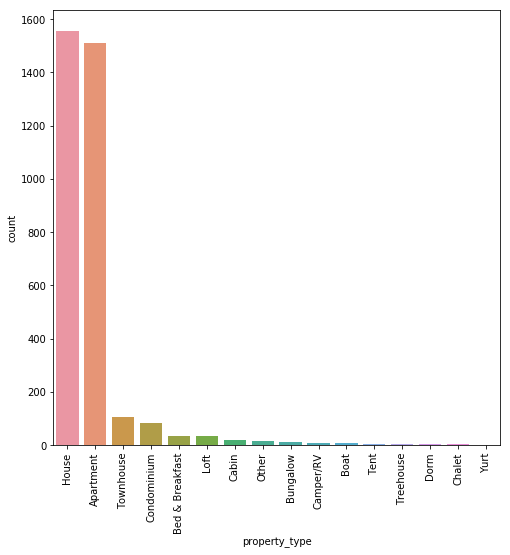

In [7]:

print("Number of types of hosted properties: ", len(set(data.property_type)))
print((data.property_type.value_counts())/(data.property_type.count())*100)
Plot(data, 'property_type')


## Question 2: What are the top 5 neighborhoods that have the maximum number of hosts?

Naumber of neighborhoods:  81
Capitol Hill    10.320494
Ballard          6.262864
Belltown         5.998236
Minor            5.645398
Queen Anne       5.498383
Name: neighbourhood, dtype: float64


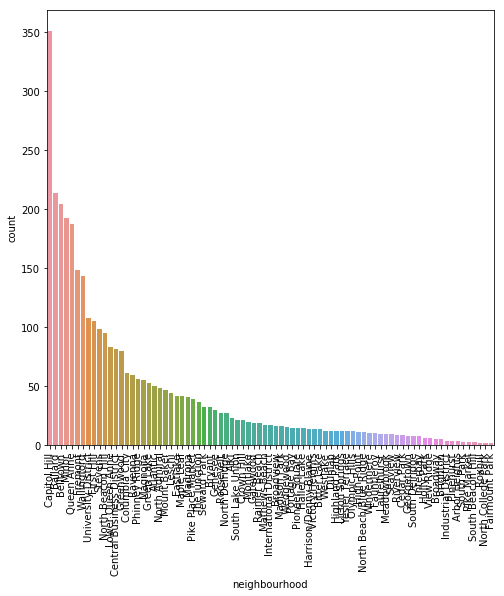

In [8]:


print("Naumber of neighborhoods: ", len(set(data.neighbourhood)))
#print the analysis of values of the feature neighbourhood
neighbourhood = (data.neighbourhood.value_counts())/(data.neighbourhood.count())*100
neighbourhood = neighbourhood.nlargest(5)
print(neighbourhood)
Plot(data, 'neighbourhood')

## Question 3: Which neighborhoods have the highest average of prices and the neighborhoods have the lowest aversge of prices?


In [9]:

#grouping the dataset by neighbourhood
#new_list_neighbourhood = data.groupby('neighbourhood').count()

new_list_neighbourhood = data.groupby('neighbourhood').mean()


new_list_top_5_neighbourhood = new_list_neighbourhood.nlargest(5,'price')
new_list_low_5_neighbourhood = new_list_neighbourhood.nsmallest(5,'price')

print("Top 5 neighbourhoods :\n")
print( new_list_top_5_neighbourhood)

print("\n\n Low 5 neighbourhoods :\n")
print( new_list_low_5_neighbourhood)


Top 5 neighbourhoods :

                          price
neighbourhood                  
Fairmount Park       370.000000
Industrial District  245.000000
Portage Bay          241.428571
Westlake             197.000000
Alki                 196.652174


 Low 5 neighbourhoods :

                   price
neighbourhood           
Roxhill        60.000000
Olympic Hills  63.666667
Dunlap         71.750000
Rainier Beach  76.722222
Georgetown     77.000000


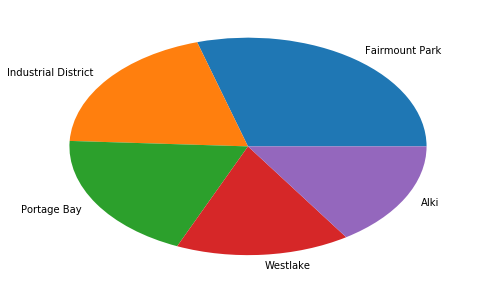

In [10]:
Plot_pie(new_list_top_5_neighbourhood, 'price')

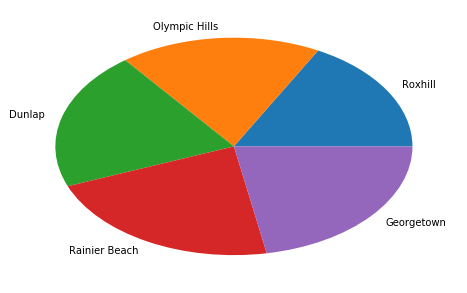

In [11]:
Plot_pie(new_list_low_5_neighbourhood, 'price')